<a href="https://colab.research.google.com/github/JacksonZheng07/California-Housing-/blob/main/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load and split data
data = fetch_california_housing()
X = data.data
y = data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#Setting up X,y train
X_train = torch.from_numpy(X_train_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.float32))

# Convert test set to tensors
X_test = torch.from_numpy(X_test_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.float32)).view(-1, 1)

y_train = y_train.view(y_train.shape[0], 1)

In [62]:
#Setting Up Model
n_sample, n_features = X_train.shape
input = n_features
output = 1
model = torch.nn.Linear(input, output)

LR = 0.0001
epochs = 100000
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

epoch: 10000, loss = 0.6759
epoch: 20000, loss = 0.5750
epoch: 30000, loss = 0.5591
epoch: 40000, loss = 0.5486
epoch: 50000, loss = 0.5408
epoch: 60000, loss = 0.5350
epoch: 70000, loss = 0.5307
epoch: 80000, loss = 0.5275
epoch: 90000, loss = 0.5252
epoch: 100000, loss = 0.5234
R2 Score: 0.5771


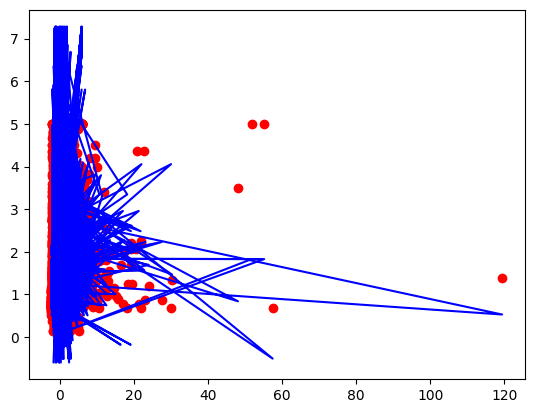

In [63]:
#Running test
for epoch in range(epochs):
  #Zeroing
  optimizer.zero_grad()

  #Finding loss
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)

  #Back Prop
  loss.backward()

  #Optimizing
  optimizer.step()

  if (epoch+1) % 10000 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Predict on test set
with torch.no_grad():
    y_pred_test = model(X_test)

# Convert predictions and targets to NumPy
y_pred_np = y_pred_test.numpy()
y_test_np = y_test.numpy()

# Calculate R² score
r2 = r2_score(y_test_np, y_pred_np)
print(f'R2 Score: {r2:.4f}')

predicted = model(X_train).detach().numpy()
plt.plot(X_train, y_train, 'ro')
plt.plot(X_train, predicted, 'b')
plt.show()